In [1]:
import torch
from torch import nn
import numpy as np
from d2l import torch as d2l

#人工创造一个小数据集
n_train, n_test, num_inputs = 20, 100, 200  #训练集20个，验证集100个，维度设定为高维，200

true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05  #手动生成一个权重w和b

features = torch.randn((n_train + n_test, num_inputs))  #随机产生一个特征矩阵，行是一共训练20个加上验证的100个共120行，列是维度200维

labels = torch.matmul(features, true_w) + true_b  

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)  #再根据生成的特征，w，b，加入一个轻微扰动，生成一个label

train_features, test_features = features[:n_train, :], features[n_train:, :]

train_labels, test_labels = labels[:n_train], labels[n_train:]  #对训练，验证的数据进行下划分

In [2]:
# 随机初始化模型参数
def init_params():
    
    w = torch.randn((num_inputs, 1), requires_grad=True)
    
    b = torch.zeros(1, requires_grad=True)
    
    return [w, b]

In [12]:
# L2范数惩罚项的定义
def l2_penalty(w):

    return (w**2).sum() / 2

In [16]:
# 定义训练和测试
batch_size, num_epochs, lr = 1, 100, 0.003

net, loss = d2l.linreg, d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)

train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):
    
    w, b = init_params()
    
    train_ls, test_ls = [], []
    
    for _ in range(num_epochs):
    
        for X, y in train_iter:
            # 添加了L2范数惩罚项
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
           
            l = l.sum()

            if w.grad is not None:
                
                w.grad.data.zero_()
                
                b.grad.data.zero_()
            
            l.backward()
            
            d2l.sgd([w, b], lr, batch_size)
        
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
        
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 13.458812713623047


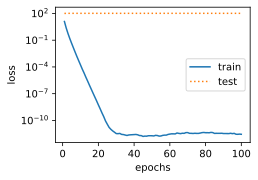

In [17]:
fit_and_plot(lambd=0)

L2 norm of w: 0.04334856942296028


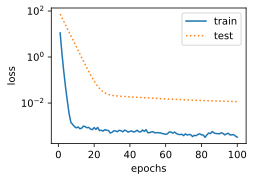

In [18]:
fit_and_plot(lambd=3)